In [91]:
#Forcasting Future Air Passengers

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import matplotlib.pyplot as plt

passengers = pd.read_csv("AirPassengers.csv")

In [92]:
passengers.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [88]:
# Creating Lagged Predictors
#passengers_1 - autoregressive
#passengers_12 - seasonal adjustment

In [89]:
passengers['passengers_1'] = passengers['#Passengers'].shift(1)
passengers['passengers_12'] = passengers['#Passengers'].shift(12)

In [90]:
passengers.head(3)

,Month,#Passengers,passengers_1,passengers_12
0,1949-01,112,NaN,NaN
1,1949-02,118,112.0,NaN
2,1949-03,132,118.0,NaN


In [46]:
y = passengers['#Passengers'][12:] #dropiing first 12 values to remove NaN records

In [47]:
x = passengers.drop(['Month', '#Passengers'], 1)[12:] #dropping all non-predictors

In [49]:
x

,passengers_1,passengers_12
12,118.0,112.0
13,115.0,118.0
14,126.0,132.0
15,141.0,129.0
16,135.0,121.0
...,...,...
139,622.0,559.0
140,606.0,463.0
141,508.0,407.0
142,461.0,362.0


In [50]:
#Model Calibration

In [76]:
#leaving the last 12 months for test/validation
y_t = y[:-11]
x_t = x[:-11]

y_v = y[-11:]
x_v = x[-11:]

In [77]:
#Linear Regression

In [78]:
model = LinearRegression().fit(x_t, y_t)

coef = model.coef_.tolist()
coef.insert(0, model.intercept_)
var = x_t.columns.tolist()
var.insert(0, 'Intercept')
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
out
# out.to_excel("result.xlsx")

,Variable,Coefficient
0,Intercept,10.183843
1,passengers_1,0.168727
2,passengers_12,0.894040


In [79]:
#Model fit on training set

In [80]:
#using R2
y_t_pred = model.predict(x_t)
print('R2: %.4f' % r2_score(y_t, y_t_pred))

R2: 0.9794


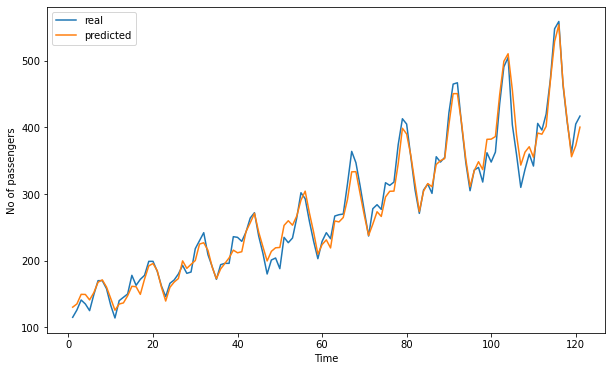

In [85]:
x_t_a = range(1, 122) 
plt.figure(figsize=(10,6))
plt.plot(x_t_a, y_t, label = 'real')
plt.plot(x_t_a, y_t_pred, label = 'predicted')
plt.xlabel("Time")
plt.ylabel("No of passengers")
plt.legend()
plt.show()

In [86]:
#Prediction on validation set
len(y_v)

11

ME: 1.8408
RMSE: 18.1906


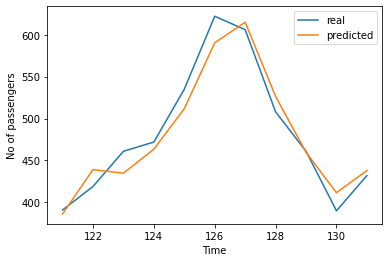

In [87]:
y_v_pred = model.predict(x_v)
print('ME: %.4f' % np.mean(y_v - y_v_pred))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_v, y_v_pred)))

x_v_a = range(121, 132)
plt.plot(x_v_a, y_v, label = 'real')
plt.plot(x_v_a, y_v_pred, label = 'predicted')
plt.xlabel("Time")
plt.ylabel("No of passengers")
plt.legend()
plt.show()